In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://mitu.co.in/dataset
df = pd.read_csv('/home/mitu/Salary_Data.csv')

In [4]:
df.shape

(30, 2)

In [5]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


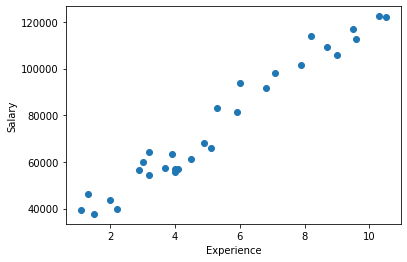

In [7]:
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(df['YearsExperience'], df['Salary'])

In [8]:
# Import the class
from sklearn.linear_model import LinearRegression

In [9]:
# create the object
regressor = LinearRegression()

In [14]:
x = df['YearsExperience'].values
x = x.reshape(-1, 1)

In [16]:
x.shape

(30, 1)

In [17]:
y = df['Salary']

In [18]:
# train the algorithm
regressor.fit(x, y)

LinearRegression()

In [23]:
# predict
regressor.predict([[20]])

array([214791.44662777])

In [24]:
# slope of the line
regressor.coef_

array([9449.96232146])

In [25]:
# intercept
regressor.intercept_

25792.200198668696

In [26]:
20 * 9449.96232146 + 25792.200198668696

214791.4466278687

In [27]:
regressor.predict([[20],[12.8],[14]])

array([214791.44662777, 146751.71791329, 158091.67269904])

In [28]:
pred = regressor.predict(x)

In [29]:
pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [32]:
result = pd.DataFrame({
    'Actual': y,
    'Predicted': pred
})

In [33]:
result

,Actual,Predicted
0,39343,36187.158752
1,46205,38077.151217
2,37731,39967.143681
3,43525,44692.124842
4,39891,46582.117306
5,56642,53197.090931
6,60150,54142.087163
7,54445,56032.079627
8,64445,56032.079627
9,57189,60757.060788


In [36]:
sum(abs(y - pred)) / len(y)

4644.2012894435375

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, pred)

4644.2012894435375

In [38]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y, pred)

0.07048034398306606

In [39]:
regressor.score(x, y)

0.9569566641435086

In [40]:
from sklearn.metrics import r2_score
r2_score(y, pred)

0.9569566641435086

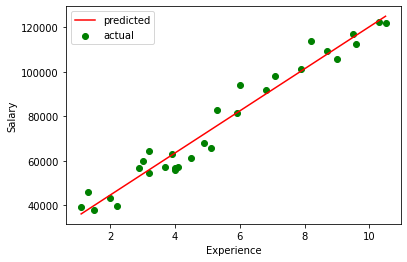

In [41]:
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y,label='actual', color='g')
plt.plot(x, pred, label='predicted',color='r')
plt.legend()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

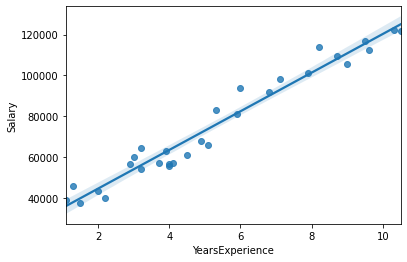

In [42]:
import seaborn as sns
sns.regplot(x='YearsExperience', y='Salary', data=df)

In [44]:
import scipy.stats

In [46]:
scipy.stats.linregress(df['YearsExperience'], df['Salary'])

LinregressResult(slope=9449.96232145508, intercept=25792.20019866868, rvalue=0.9782416184887599, pvalue=1.1430681092271558e-20, stderr=378.75457423882153, intercept_stderr=2273.0534325816075)

In [47]:
df = pd.read_csv('/home/mitu/mtcars.csv')

In [48]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [49]:
x = df[['disp','hp','wt']]
y = df['mpg']

In [50]:
regressor = LinearRegression()

In [51]:
regressor.fit(x,y)

LinearRegression()

In [52]:
df.corrwith(df['mpg'])

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
dtype: float64

In [53]:
regressor.predict([[221, 102, 2.91]])

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.65986648])